# SVM Kernels

In [5]:
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
X = np.linspace(-5, 5, 100)
y = np.sqrt(10**2 - X**2)
y = np.hstack([y, -y])
X = np.hstack([X, -X])

In [13]:
x1 = np.linspace(-5, 5, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

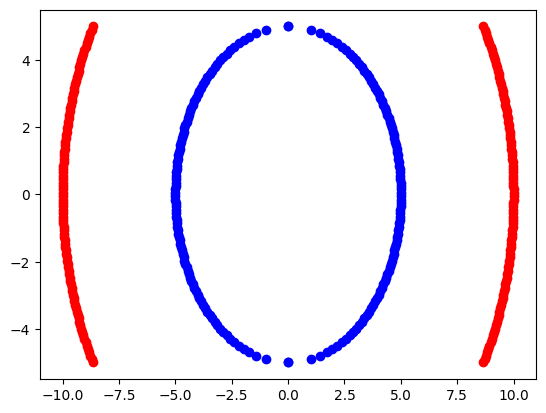

In [16]:
plt.scatter(y,X, color='red')
plt.scatter(y1, x1, color='blue')

In [17]:
df1 = pd.DataFrame(np.vstack([y, X]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)
X = df[['X1', 'X2']].values
y = df['Y'].values


In [18]:
df

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1


In [21]:
X = df.iloc[:, :2]
y = df.Y


In [22]:
X

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
395,-1.969049,-4.59596
396,-1.714198,-4.69697
397,-1.406908,-4.79798
398,-0.999949,-4.89899


In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Kernel 
## K(x, y) = (x^T*y+c)^d

In [25]:
df['X1_Squared'] = df.X1 ** 2
df['X2_Squared'] = df.X2 ** 2
df['X1_X2'] = df.X1 * df.X2
df.head()

,X1,X2,Y,X1_Squared,X2_Squared,X1_X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [26]:
X = df[['X1', 'X2', 'X1_Squared', 'X2_Squared', 'X1_X2']]
y = df['Y']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
X_train

,X1,X2,X1_Squared,X2_Squared,X1_X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [32]:
!pip install nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Using cached fastjsonschema-2.21.2-py3-none-any.whl (24 kB)



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
fig = px.scatter_3d(df, x='X1', y='X2', z='X1_X2', color='Y')
fig.show()

In [35]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'
fig = px.scatter_3d(df, x='X1_Squared', y='X2_Squared', z='X1_X2', color='Y')
fig.show()

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

1.0


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

1.0


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

1.0


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[55  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

1.0
